In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error


In [37]:
df = pd.read_csv("D:\ml deployment\salary.csv")

In [38]:
X = df[['YearsExperience']]
y = df['Salary']

In [39]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2 , random_state=42)

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(X_test)
print(y_pred)

[115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548  60189.69970699]


In [42]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test ,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = mse ** 0.5

In [43]:
print("R-square:" , r2)
print("mean_absolute_error:" , mae)
print("mean_squared_error:" , mse)
print("Root mean-squared error:" , rmse)

R-square: 0.9024461774180497
mean_absolute_error: 6286.453830757749
mean_squared_error: 49830096.85590839
Root mean-squared error: 7059.04362190151


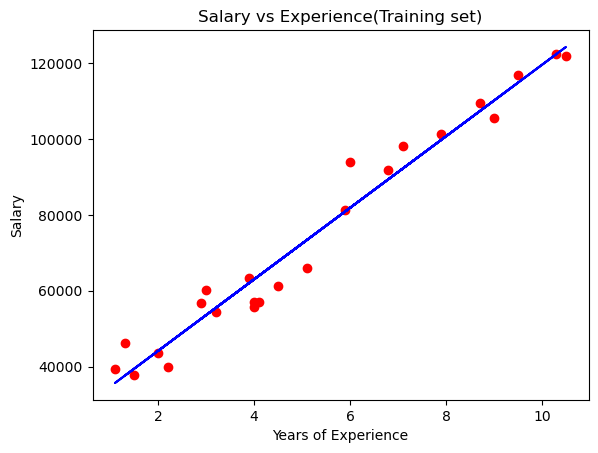

In [44]:
plt.scatter(X_train, y_train , color='red')
plt.plot(X_train, model.predict(X_train) , color='blue')
plt.title('Salary vs Experience(Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

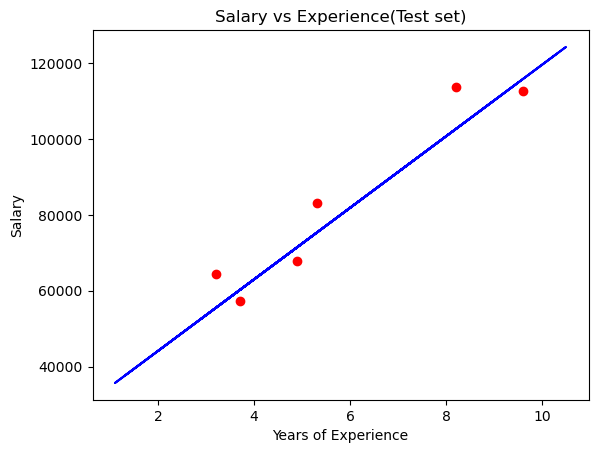

In [45]:
plt.scatter(X_test, y_test , color='red')
plt.plot(X_train, model.predict(X_train) , color='blue')
plt.title('Salary vs Experience(Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [46]:
print("*** Making predictions for new data ***")
new_experience_years_for_predictions = [1.5, 4, 8, 12, 15, 20, 25]

for new_experience_years in new_experience_years_for_predictions:
    new_salary_prediction = model.predict(pd.DataFrame({'YearsExperience':[new_experience_years]}))
    print("Predicted Salary for {} years of experience: {}".format(new_experience_years , new_salary_prediction))

*** Making predictions for new data ***
Predicted Salary for 1.5 years of experience: [39457.30599632]
Predicted Salary for 4 years of experience: [63016.8443039]
Predicted Salary for 8 years of experience: [100712.10559602]
Predicted Salary for 12 years of experience: [138407.36688815]
Predicted Salary for 15 years of experience: [166678.81285724]
Predicted Salary for 20 years of experience: [213797.8894724]
Predicted Salary for 25 years of experience: [260916.96608755]


In [47]:
import joblib
joblib.dump(model , r"D:\ml deployment\final_Salary_model.pkl")

['D:\\ml deployment\\final_Salary_model.pkl']

In [48]:
print(X)
print(X.columns)
print(list(X.columns))

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5
Index(['YearsExperience'], dtype='object')
['YearsExperience']


In [49]:
joblib.dump(list(X.columns) , r"D:\ml deployment\salary_column_names.pkl")

['D:\\ml deployment\\salary_column_names.pkl']

In [50]:
## Loading Model
col_names = joblib.load('salary_column_names.pkl')
print(col_names)

['YearsExperience']


In [51]:
loaded_model = joblib.load("final_Salary_model.pkl")

In [52]:
print("*** Making predictions for new data using loaded model ***")
new_experience_years_for_predictions = [1.5, 4, 8, 12, 15, 20, 25]

for new_experience_years in new_experience_years_for_predictions:
    new_salary_prediction = loaded_model.predict(pd.DataFrame({'YearsExperience':[new_experience_years]}))
    print("Predicted Salary for {} years of experience: {}".format(new_experience_years , new_salary_prediction))

*** Making predictions for new data using loaded model ***
Predicted Salary for 1.5 years of experience: [39457.30599632]
Predicted Salary for 4 years of experience: [63016.8443039]
Predicted Salary for 8 years of experience: [100712.10559602]
Predicted Salary for 12 years of experience: [138407.36688815]
Predicted Salary for 15 years of experience: [166678.81285724]
Predicted Salary for 20 years of experience: [213797.8894724]
Predicted Salary for 25 years of experience: [260916.96608755]
